In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("insurance.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print('Feature shape:', X.shape)
print('Target shape:', y.shape)
print('\nFeature preview (first 5 rows):')
print(X[:5])


Feature shape: (1338, 6)
Target shape: (1338,)

Feature preview (first 5 rows):
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]


In [4]:
#encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [1,4,5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


After OneHotEncoding, feature shape: (1338, 8)

First 5 rows after encoding:
[[0.0 1.0 0.0 0.0 1.0 19 27.9 0]
 [1.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [1.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [1.0 0.0 1.0 0.0 0.0 33 22.705 0]
 [1.0 0.0 1.0 0.0 0.0 32 28.88 0]]


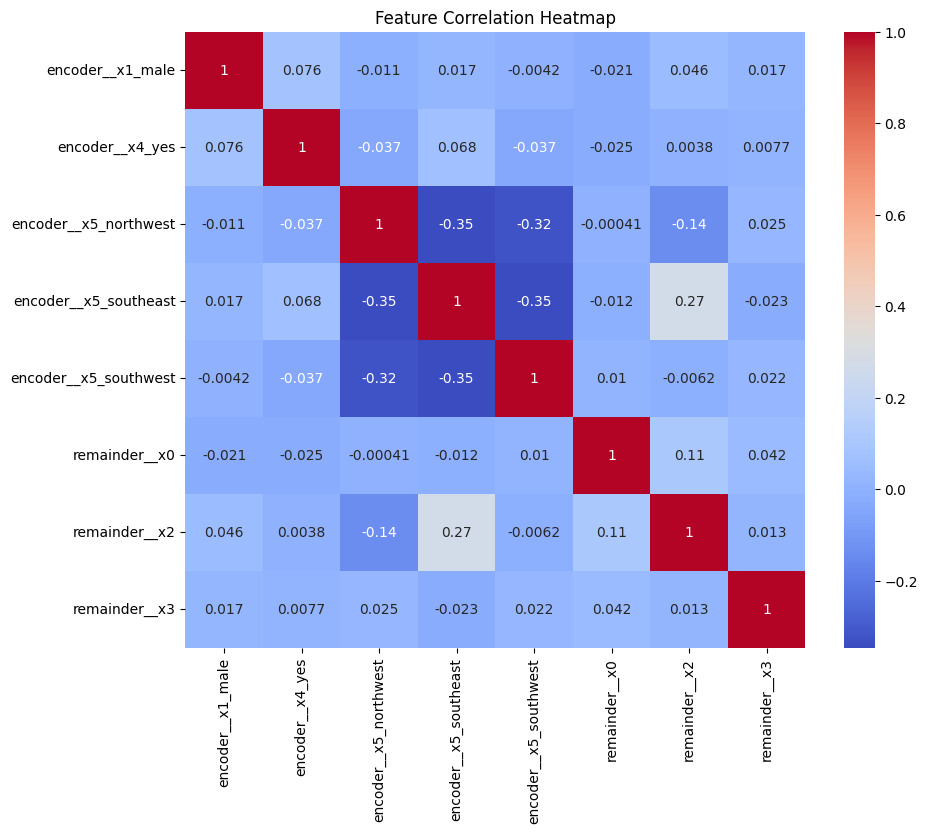

In [13]:
#corelation between features with heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
corr = pd.DataFrame(X, columns=feature_names).astype(float).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()




In [9]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 1070
Test samples: 268
Intercept: -517.136835842628
Number of coefficients: 11


In [ ]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Charge': y_test,
    'Predicted Charge   ': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,9724.53000,11169.93
1,8547.69130,9486.71
2,45702.02235,38181.12
3,12950.07120,16266.31
4,9644.25250,6914.65
...,...,...
263,15019.76005,14760.23
264,6664.68595,8277.98
265,20709.02034,16149.97
266,40932.42950,32904.76


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 31827950.23
R^2 Score: 0.8000


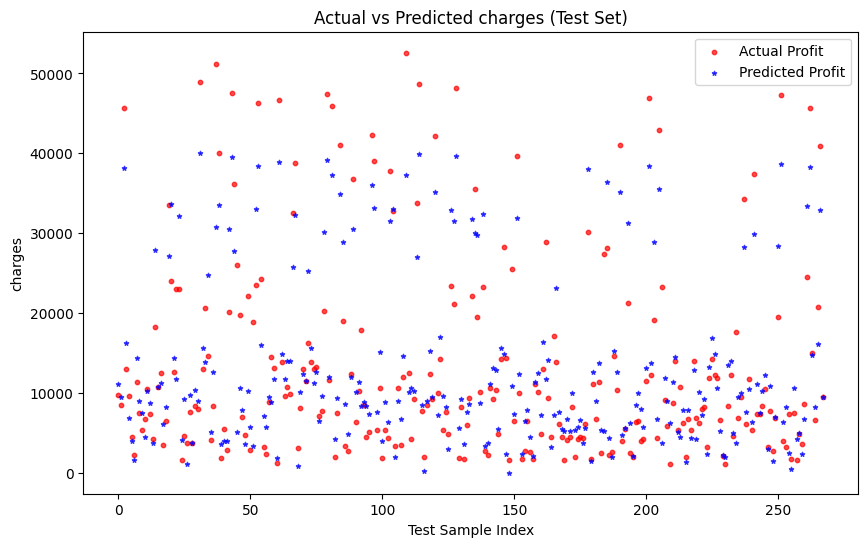

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=10)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='*', s=10)
plt.title('Actual vs Predicted charges (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('charges')
plt.legend()
plt.show()